<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [1]:
def dfs(G, origen, destino):
    path = []
    stack = [origen]
    expanded = 0
    trobat = False
    while (len(stack) != 0 and not trobat):
        current = stack.pop()
        # Visitamos el nodo caso aun no hemos visitado
        if current not in path:
            # Adicionamos a la lista
            path.append(current)
            expanded += 1
            if current == destino:
                trobat = True
            for i in G[current]:
                # Ponemos sus vecinos a la pilla
                stack.append(i) 
    return {
        'path' : path,
        'expanded' : expanded
    }

In [2]:
import networkx as nx
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

{'path': [1, 42, 18, 99, 56, 95], 'expanded': 6}

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [3]:
def cnx(G):
    componentes = []
    # Inicializamos los nodos como no visitados
    initNodes(G)
    for indice in G.nodes():
        sublista = []
        if G.nodes[indice]['visited'] == False:
            visit(G, indice, sublista)
            # La salida de la recursión indica que ya visitamos todos los nodos de esta componente
            componentes.append(sublista)           
    return {
        'componentes' : componentes,
    }

def initNodes(G):
    for i in G.nodes():
        G.nodes[i]['visited'] = False

def visit(G, i, sub):
    G.nodes[i]['visited'] = True
    sub.append(i)
    for j in G.neighbors(i):
        if  G.nodes[j]['visited'] == False :
            visit(G, j, sub)

{'componentes': [[0, 7, 9, 1, 2, 5, 10, 4, 6, 8, 3],
  [11, 12, 13, 14, 15, 16, 17],
  [18, 20, 19, 24, 21, 22, 26, 23, 27, 25],
  [28, 29, 30, 31, 32, 33, 34, 35],
  [36, 37, 38, 39, 40, 41, 42]]}

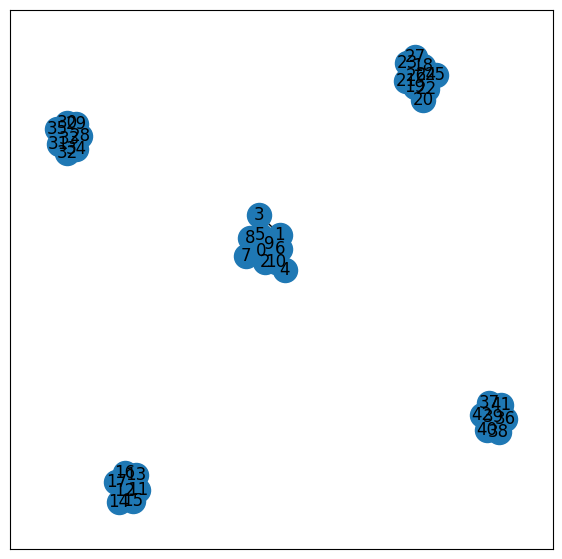

In [4]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)
cnx(G)